# Linear Algebra, Eigensystems, Decompositions

"Everything that comes together falls apart." -- John Green

In [1]:
%%capture
%pylab inline
import os
from IPython.display import Image

In [2]:
# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir("drive/My Drive/Books_Writings/NLPBook/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Definition

Assume you are comfortable with (1) linear transformations, (2) determinants, (3) span, and (4) change of basis.

- *Definition*: An eigenvector $v$ of matrix $M$ is one that remains on the same span before and after the linear transformation ($M$).

- So, this means the vector remains on the span and is only stretched or shrunk. In 2-D, this means that a vector $v=[v_1,v_2]^\top$ will simply be multiplied by a constant, i.e., its orientation (span) will not change.

- The number of eigenvectors of the transformation will be the same as the dimension of the vector space.

Example:

In [3]:
M = array([[2,3],[0,-1]])
v = array([1,0])
v_new = M.dot(v)
print(v_new)

[2 0]


And so, we see that $v$ gets stretched into $v_{new}$. Its span remains the same, therefore, $v$ is an eigenvector of the linear transformation $M$.

Since we are in 2-D, there will be two eigenvectors, and we may solve for them with the equation

$$
\lambda v = M · v
$$

In [4]:
M = array([[2,3],[0,-1]])
res = eig(M)
print(res)
print(res[0])  #eigenvalues
print(res[1])  #eigenvectors

EigResult(eigenvalues=array([ 2., -1.]), eigenvectors=array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]]))
[ 2. -1.]
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


We get two eigenvectors:

$$
v_1 = \left[\begin{array}{c} 1\\0 \end{array} \right], \quad \quad v_2 = \left[\begin{array}{c} -0.71\\0.71 \end{array} \right]
$$

We can also see that the eigenvalues $(2, -1)$ are those that give us the stretching factor for each eigenvector.

- When we rotate an object, the eigenvector is the axis of rotation. And the eigenvalue is 1, because a rotation does not stretch or shrink the vector space.

## Eigenvalues and eigenvectors


Understanding eigenvalues and eigenvectors is best done visually. An excellent simple exposition is available at: http://setosa.io/ev/eigenvectors-and-eigenvalues/

A $M \times M$ matrix $A$ has attendant $M$ eigenvectors $V$ and eigenvalues $\lambda$ if we can write

\begin{equation}
\lambda V = A \cdot V
\end{equation}

Starting with matrix $A$, the eigenvalue decomposition gives both $V$ and $\lambda$.

It turns out we can find $M$ such eigenvalues and eigenvectors, as there is no unique solution to this equation. We also require that $\lambda \neq 0$.

We may implement this in code as follows.

In [5]:
A = array([[5,1],[2,4]])
E = eig(A)
print(E)

v1 = E[1][:,0]
v2 = E[1][:,1]
e1 = E[0][0]
e2 = E[0][1]

print(e1*v1)
print(A.dot(v1))
print(e2*v2)
print(A.dot(v2))

EigResult(eigenvalues=array([6., 3.]), eigenvectors=array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))
[4.24264069 4.24264069]
[4.24264069 4.24264069]
[-1.34164079  2.68328157]
[-1.34164079  2.68328157]


## Solving for eigenvectors and eigenvalues

The math is as follows:

$$  M · v = λ v $$

$$  M · v = (λ I) v $$

$$  (M - λ I) \cdot v = {\bf 0}  $$

which means $v$ is being flattened down to ${\bf 0}$, which can only happen if the linear transformation $ (M - λ I)$ is singular, i.e., its determinant must be 0.

$$ det(M - λ I) = 0 $$

In our example, $M = \left[\begin{array}{cc} 2 & 3\\0 & -1 \end{array} \right]$. So

$$
M - λ I = \left[\begin{array}{cc} 2-\lambda & 3\\0 & -1-\lambda \end{array} \right]
$$

Then

$$
det(M-λ I) = (2-\lambda)(-1-\lambda) - (0)(3) = 0
$$

which is a quadratic equation

$$
\lambda^2 - λ - 2 = 0
$$

with two roots, $\lambda=2$ and $λ = -1$, which you can see are the eigenvalues above. Using these, we can extract (solve for) the eigenvectors.

## No eigenvectors?

Yes, this is possible. See the matrix

$$
M = \left[\begin{array}{cc} 0 & -1\\1 & 0 \end{array} \right]
$$

The equation $det(M - λ I)= \lambda^2 + 1 = 0$ has no real roots.

A shear has just one eigenvector. (Check this.)

## New Discovery between Eigenvalues and Eigenvectors

[Neutrinos Lead to Unexpected Discovery in Basic Math](https://www.quantamagazine.org/neutrinos-lead-to-unexpected-discovery-in-basic-math-20191113/?mc_cid=45450bd311&mc_eid=a374c9ce95).

The [paper](https://arxiv.org/abs/1908.03795) with [Terrence Tao](https://terrytao.wordpress.com/). What the heck is a [neutrino](https://www.scientificamerican.com/article/what-is-a-neutrino/)?

## Eigenbasis

A basis made up of eigenvectors is an eigenbasis.


In [6]:
EB = eig(M)[1]
EB   #eigenbasis

array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]])

In [7]:
#This has an interesting property
inv(EB).dot(M).dot(EB)

array([[ 2.,  0.],
       [ 0., -1.]])

It always gives a diagonal matrix. So it may be used to speed up computations where we have matrix powers.

In [8]:
M = array([[1,4],[3,-2]])
# x = array([2,5])
y = M.dot(M).dot(M).dot(M)   #Fourth power of M
print('M4 =',y)

M4 = [[ 181 -116]
 [ -87  268]]


In [9]:
#The eigenbasis can be used to quickly calculate powers of a matrix
EB = eig(M)[1]
print(EB)
A = (inv(EB).dot(M).dot(EB))
print(A.round(4))
A = A**4
print(A.round(4))
M4 = EB.dot(A).dot(inv(EB))
print('M4 check =')
print(M4)

[[ 0.86925207 -0.60422718]
 [ 0.49436913  0.79681209]]
[[ 3.2749  0.    ]
 [ 0.     -4.2749]]
[[115.0274   0.    ]
 [  0.     333.9726]]
M4 check =
[[ 181. -116.]
 [ -87.  268.]]


## Application of eigen decomposition

We will read in data on US interest rates to find out its drivers. The data below is the time series of interest rates of different maturities from 3 months to 10 years (eight columns of interest rates).

Eigen decomposition is undertaken on the $8 \times 8$ covariance matrix of this data. The idea is to find the number of large eigenvalues (say 3). This suggests that the 8-dimensional system of rates may be collapsed down to 3 dimensions. Therefore, eigen decomposition is the underlying mathematical approach for principal components analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), which uses an extension of eigen decomposition known as [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (discussed later in this notebook).

The code below undertakes the eigen decomposition and finds two principal components explain almost all of the joint variation (in the covariance matrix) across the different interest rate time series.

In [10]:
import pandas as pd
rates = pd.read_csv("NLP_data/tryrates.txt", sep="\t")
print(rates.columns)
rates.head()

Index(['DATE', 'FYGM3', 'FYGM6', 'FYGT1', 'FYGT2', 'FYGT3', 'FYGT5', 'FYGT7',
       'FYGT10'],
      dtype='object')


DATE  FYGM3  FYGM6  FYGT1  FYGT2  FYGT3  FYGT5  FYGT7  FYGT10
0  Jun-76   5.41   5.77   6.52   7.06   7.31   7.61   7.75    7.86
1  Jul-76   5.23   5.53   6.20   6.85   7.12   7.49   7.70    7.83
2  Aug-76   5.14   5.40   6.00   6.63   6.86   7.31   7.58    7.77
3  Sep-76   5.08   5.30   5.84   6.42   6.66   7.13   7.41    7.59
4  Oct-76   4.92   5.06   5.50   5.98   6.24   6.75   7.16    7.41

In [11]:
rates = rates.drop("DATE", axis=1)
cv = rates.cov().values
cv.round(3)

array([[ 9.584,  9.44 , 10.07 ,  9.537,  9.067,  8.404,  7.972,  7.607],
       [ 9.44 ,  9.345, 10.006,  9.514,  9.062,  8.413,  7.988,  7.627],
       [10.07 , 10.006, 10.77 , 10.303,  9.847,  9.179,  8.736,  8.358],
       [ 9.537,  9.514, 10.303,  9.981,  9.605,  9.029,  8.635,  8.29 ],
       [ 9.067,  9.062,  9.847,  9.605,  9.284,  8.776,  8.419,  8.104],
       [ 8.404,  8.413,  9.179,  9.029,  8.776,  8.369,  8.067,  7.798],
       [ 7.972,  7.988,  8.736,  8.635,  8.419,  8.067,  7.799,  7.558],
       [ 7.607,  7.627,  8.358,  8.29 ,  8.104,  7.798,  7.558,  7.346]])

In [12]:
eigen_decomp = eig(cv)
eigen_decomp

EigResult(eigenvalues=array([7.07099627e+01, 1.65504854e+00, 9.01581920e-02, 1.65591139e-02,
       3.00119934e-03, 8.56243864e-04, 1.59728170e-03, 2.14599338e-03]), eigenvectors=array([[ 0.35969904,  0.49201202,  0.59353257, -0.38686589, -0.34419189,
        -0.03645143, -0.04282858,  0.07045281],
       [ 0.35819444,  0.40372601,  0.0635517 ,  0.20153645,  0.79515713,
         0.03744201,  0.15571962, -0.07823632],
       [ 0.38751165,  0.28678312, -0.30984414,  0.61694982, -0.45913099,
         0.16540673, -0.10492279, -0.20442661],
       [ 0.37531685,  0.01733899, -0.45669522, -0.19416861,  0.03906518,
        -0.54916644, -0.30395044,  0.46590654],
       [ 0.36146528, -0.13461055, -0.36505588, -0.41827644, -0.06076305,
         0.55849003,  0.45521861,  0.14203743],
       [ 0.34055151, -0.31741378, -0.01159915, -0.18845999, -0.03366277,
        -0.42773742,  0.19935685, -0.72373049],
       [ 0.32609408, -0.40838395,  0.19017973, -0.05000002,  0.16835391,
         0.39347299, -

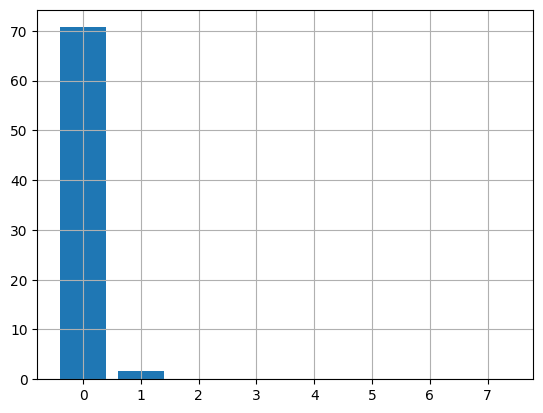

In [13]:
bar(arange(len(eigen_decomp[0])),eigen_decomp[0])
grid()

How do you interpret this matrix below?

In [14]:
eigen_decomp[1][:,:3]

array([[ 0.35969904,  0.49201202,  0.59353257],
       [ 0.35819444,  0.40372601,  0.0635517 ],
       [ 0.38751165,  0.28678312, -0.30984414],
       [ 0.37531685,  0.01733899, -0.45669522],
       [ 0.36146528, -0.13461055, -0.36505588],
       [ 0.34055151, -0.31741378, -0.01159915],
       [ 0.32609408, -0.40838395,  0.19017973],
       [ 0.31355303, -0.47616732,  0.41174955]])

## Application to Social Networks

An important application of eigensystems is in social networks. We often want to rank nodes in a network by influence. This is defined as eigenvalue centrality.

Centrality is defined as the principal eigenvector ${\bf x}$ obtained when the network adjacency matrix ${\bf A}$ undergoes eigen decomposition. The idea is that the ${\bf x}$ vector represents the influence scores of all nodes in a network. These scores depend on the linkages of each node with the others. Nodes with more links will acquire greater influence (say, in a social network). Nodes that are connected to more influential nodes will be more influential than nodes that are connected to less influential nodes. Connections may be direct (one-step deep) or indirect (multi-step deep), but the influence scores are represented by the following equation:

$$
{\bf x} = {\bf A} \cdot {\bf x}
$$

Given the network adjacency matrix {\bf A}, we solve the above equation system as shown below.

The first use of this equation in social networks was in [Bonacich (1987)](https://www.jstor.org/stable/2780000). A modified version of the same became Google's [`PageRank`](https://en.wikipedia.org/wiki/PageRank) algorithm.  

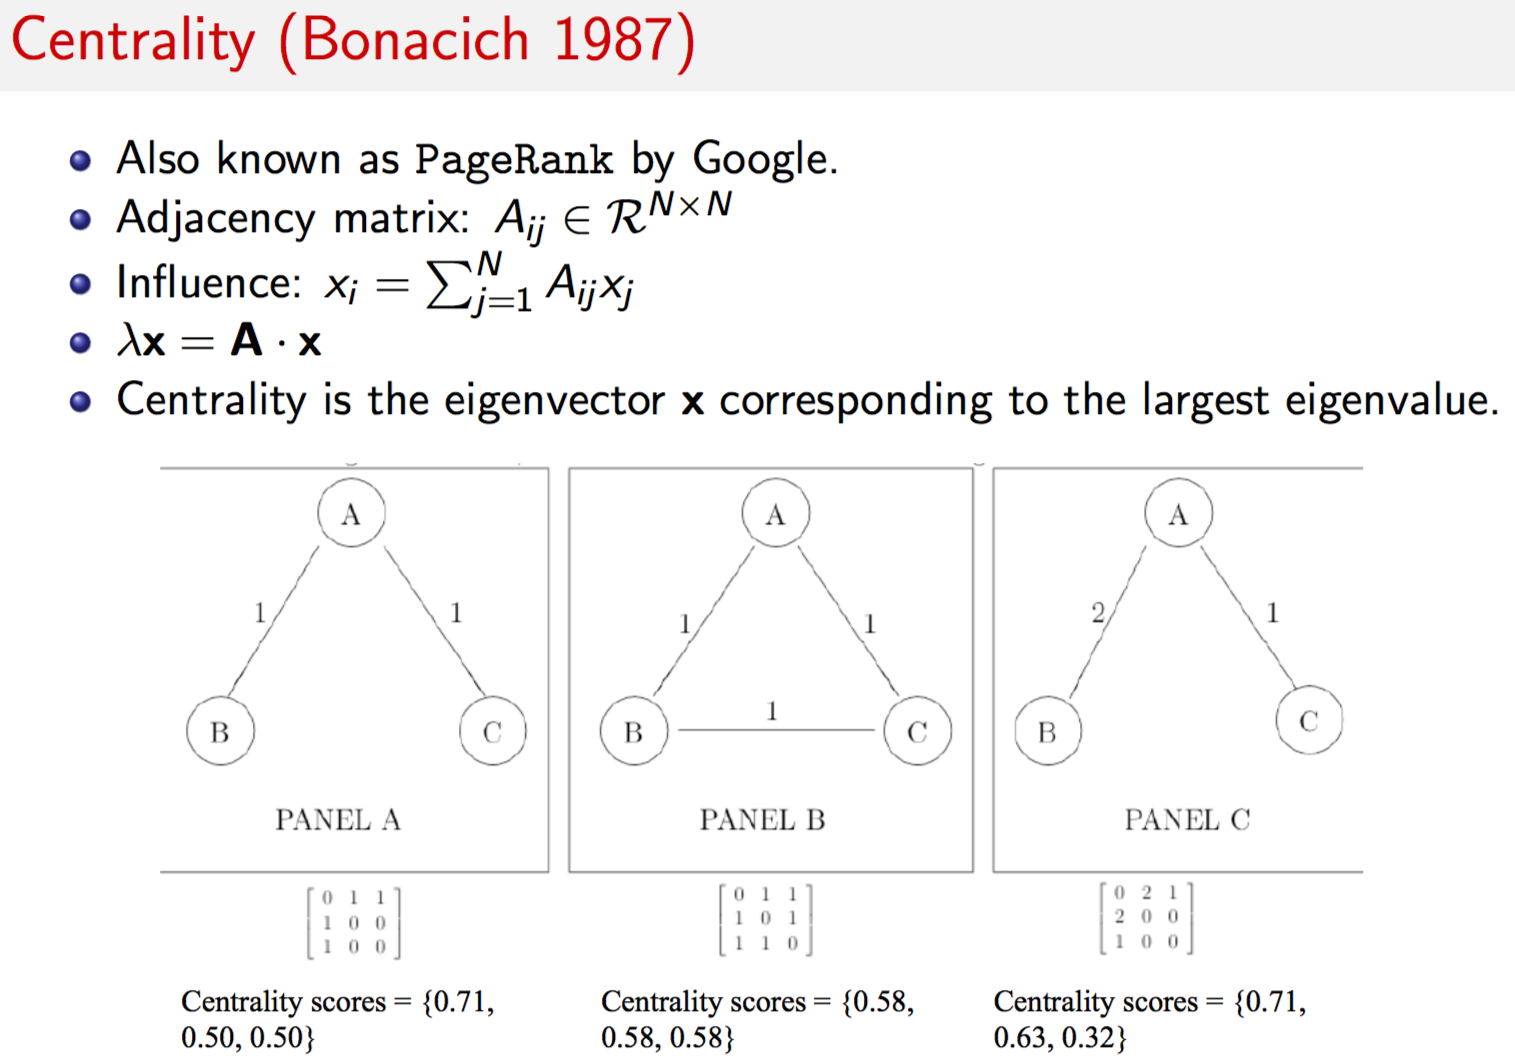

In [15]:
Image("NLP_images/Centrality.png", width=600)

In [16]:
A = array([[0,1,1],[1,0,0],[1,0,0]])
res = eig(A)
print(res)
print('Centrality vector =',res[1][:,argmax(res[0])])

EigResult(eigenvalues=array([ 1.41421356, -1.41421356,  0.        ]), eigenvectors=array([[ 0.70710678,  0.70710678,  0.        ],
       [ 0.5       , -0.5       , -0.70710678],
       [ 0.5       , -0.5       ,  0.70710678]]))
Centrality vector = [0.70710678 0.5        0.5       ]


In [17]:
A = array([[0,1,1],[1,0,1],[1,1,0]])
res = eig(A)
print(res)
print('Centrality vector =',res[1][:,argmax(res[0])])

EigResult(eigenvalues=array([-1.,  2., -1.]), eigenvectors=array([[-0.81649658,  0.57735027,  0.22645541],
       [ 0.40824829,  0.57735027, -0.79259392],
       [ 0.40824829,  0.57735027,  0.56613852]]))
Centrality vector = [0.57735027 0.57735027 0.57735027]


In [18]:
A = array([[0,2,1],[2,0,0],[1,0,0]])
res = eig(A)
print(res)
print('Centrality vector =',res[1][:,argmax(res[0])])

EigResult(eigenvalues=array([ 2.23606798, -2.23606798,  0.        ]), eigenvectors=array([[ 0.70710678,  0.70710678,  0.        ],
       [ 0.63245553, -0.63245553, -0.4472136 ],
       [ 0.31622777, -0.31622777,  0.89442719]]))
Centrality vector = [0.70710678 0.63245553 0.31622777]


## Positive definite matrices

In finance, we often need to check whether a covariance matrix is positive definite. That is, it is positive in high dimension, as a covariance matrix is a high dimension version of univariate variance.

A matrix is positive definite if all its eigenvalues are positive.

A matrix is positive semi-definite if all its eigenvalues are non-negative.

Let's check if the covariance matrix of interest rates is positive definite.

In [19]:
A = rates.cov().values   #get the covariance matrix
ev = eig(A)[0]
print(ev)

print('Positive definite? ',all(eig(A)[0]>0))

[7.07099627e+01 1.65504854e+00 9.01581920e-02 1.65591139e-02
 3.00119934e-03 8.56243864e-04 1.59728170e-03 2.14599338e-03]
Positive definite?  True


## Singular Value Decomposition (SVD)

SVD is a generalization of eigenvalue decomposition. We can obtain decompositions of non-square matrices. Consider the decomposition of a non-square matrix $M$ of size $m \times n$. The canonical decomposition is as follows:

$$
M = T \cdot S \cdot D^\top
$$

where $T$ is $m \times m$, $S$ is $m \times n$, and $D^\top$ is $n \times n$. $T$ and $D$ are [orthonormal](https://en.wikibooks.org/wiki/Linear_Algebra/Topic:_Orthonormal_Matrices) to each other. $S$ is the “singular values” matrix, i.e., a diagonal matrix with singular values on the principal diagonal. These values denote the relative importance of the terms in the TDM. ([vs orthogonal](https://math.stackexchange.com/questions/1383725/what-is-the-difference-between-orthogonal-and-orthonormal-in-terms-of-vectors-an))

Let's create a 50 x 10 matrix and then undertake SVD. We often do this with [Term-Document matrices](https://en.wikipedia.org/wiki/Document-term_matrix).

In [20]:
tdm = zeros((50,10))
for i in range(50):
    for j in range(10):
        if rand()<0.10:
            tdm[i,j] = randint(20)
tdm

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 12.,  0.,  0., 19.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.],
       [12.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0., 14.,  0.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.,  0., 13., 17.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 18.,  0.,  0., 11.,  0., 17.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [21]:
#Using SciPy
from scipy.linalg import svd
T,S,Dt = svd(tdm)
print(T.shape, S.shape, Dt.shape)
print(S)

(50, 50) (10,) (10, 10)
[38.44257772 30.43657619 27.74047935 25.0118169  21.75299177 18.89362036
 16.58686018 13.46331193  7.81024968  7.3560607 ]


In [22]:
#Using SkLearn
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=100, random_state=42)
svd.fit(tdm)

TruncatedSVD(n_components=5, n_iter=100, random_state=42)

In [23]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[0.24086419 0.18559324 0.15554934 0.12920882 0.09847   ]
0.8096855955020998
[38.44257772 30.43657619 27.74047935 25.0118169  21.75299177]


In [24]:
from sklearn.utils.extmath import randomized_svd
T, S, Dt = randomized_svd(tdm, n_components=5, n_iter=100, random_state=42)
print(T.shape, S.shape, Dt.shape)
print(S)

(50, 5) (5,) (5, 10)
[38.44257772 30.43657619 27.74047935 25.0118169  21.75299177]


## Redo Treasury rates with SVD

In [25]:
rates.shape

(367, 8)

In [26]:
from sklearn.utils.extmath import randomized_svd
T, S, Dt = randomized_svd(rates.values, n_components=2, n_iter=100, random_state=42)
print(T.shape, S.shape, Dt.shape)
print(S)

(367, 2) (2,) (2, 8)
[409.64822568  31.60909014]


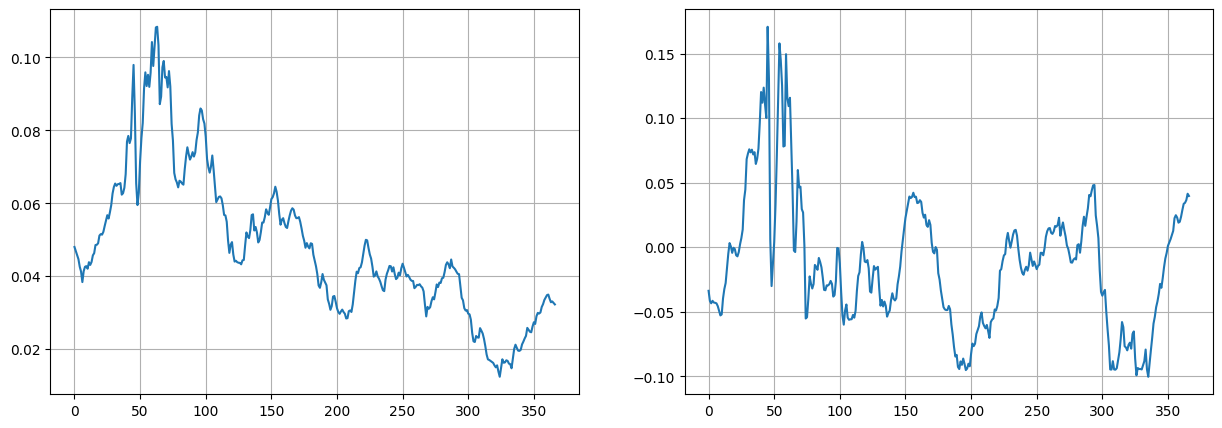

In [27]:
figure(figsize=(15,5))
subplot(1,2,1)
plot(T[:,0])
grid()
subplot(1,2,2)
plot(T[:,1])
grid()

We see that the results are the same as we get with [PCA](file:///C:/Users/srdas/Google%20Drive/Books_Writings/ML_Book/html/17_DiscriminantFactorAnalysis.html#Treasury-Rates-Dataset).

What are these components? The first one may be GDP growth and the second one may be inflation.

## Components of SVD

Here we will take a very small $M$ matrix and decompose it. Recall that

$$  M = T · S · D^⊤  $$

We will show that $T$ is the eigenvector matrix of $M · M^\top$, and $D$ is the eigenvector matrix of $M^⊤ · M$. The singular matrix contains the eigenvalues. When $M$ is a square matrix, this is the usual eigen decomposition.

In [28]:
M = array([[1,1,0,0],[1,0,1,0],[1,0,0,0],[0,1,1,1],[0,0,1,1]])
M

array([[1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 1]])

In [29]:
from scipy.linalg import svd
T,S,Dt = svd(M)
print(T.shape, S.shape, Dt.shape)
print("T =",T.round(3))
print("S =",S.round(4))
print("Dt =",Dt.round(3))

(5, 5) (4,) (4, 4)
T = [[-0.345  0.574  0.548 -0.03   0.5  ]
 [-0.447  0.341 -0.607  0.561 -0.   ]
 [-0.169  0.496 -0.205 -0.658 -0.5  ]
 [-0.652 -0.352  0.422  0.151 -0.5  ]
 [-0.476 -0.43  -0.332 -0.477  0.5  ]]
S = [2.3824 1.6866 1.1345 0.4387]
Dt = [[-0.404 -0.419 -0.661 -0.474]
 [ 0.836  0.132 -0.262 -0.464]
 [-0.233  0.855 -0.456  0.079]
 [-0.289  0.276  0.535 -0.745]]


In [30]:
#Check T
res = eig(M.dot(M.T))[1]
print(res.shape)
print("T check =",res.round(3))

(5, 5)
T check = [[ 0.345  0.574 -0.548  0.5    0.03 ]
 [ 0.447  0.341  0.607 -0.    -0.561]
 [ 0.169  0.496  0.205 -0.5    0.658]
 [ 0.652 -0.352 -0.422 -0.5   -0.151]
 [ 0.476 -0.43   0.332  0.5    0.477]]


In [31]:
#Check Dt
res = eig(M.T.dot(M))[1]
print(res.shape)
print("Dt check =",res.T.round(3))

(4, 4)
Dt check = [[ 0.404  0.419  0.661  0.474]
 [ 0.836  0.132 -0.262 -0.464]
 [ 0.289 -0.276 -0.535  0.745]
 [-0.233  0.855 -0.456  0.079]]


In [32]:
#Check S, noting that it is the square of the eigenvalues from a eigen decomposition of co-occurence
res = eig(M.T.dot(M))[0]
print("S check =",res.round(3), S**2)
res = eig(M.dot(M.T))[0]
print("S check =",res.round(3))

S check = [5.676 2.845 0.192 1.287] [5.67579031 2.84456866 1.28716169 0.19247934]
S check = [5.676 2.845 1.287 0.    0.192]


## LU Decomposition

Suppose you have a covariance matrix $A$. This is a square matrix, of course. You may want to decompose it into a product of two square matrices, i.e., factor it into $L$ and $U$. One way to do this is known as "LU decomposition."

$$
A = L · U
$$

In [33]:
A = rates.cov().values
from scipy.linalg import lu
LU = lu(A)
print('L =',LU[1].round(1))
print('U =',LU[2].round(1))

L = [[ 1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.8 -0.8  1.   0.   0.   0.   0.   0. ]
 [ 0.9  0.4 -0.2  1.   0.   0.   0.   0. ]
 [ 0.9 -0.5  0.3  0.9  1.   0.   0.   0. ]
 [ 0.9 -0.6  0.5  0.9  0.8  1.   0.   0. ]
 [ 0.8 -0.8  0.8  0.5  0.5  0.3  1.   0. ]
 [ 0.8 -0.8  0.9  0.4  0.5  0.1 -0.1  1. ]]
U = [[10.1 10.  10.8 10.3  9.8  9.2  8.7  8.4]
 [ 0.  -0.1 -0.2 -0.3 -0.3 -0.3 -0.3 -0.3]
 [ 0.   0.   0.1  0.3  0.4  0.6  0.7  0.7]
 [ 0.   0.   0.   0.   0.   0.1  0.1  0.1]
 [ 0.   0.   0.   0.  -0.  -0.  -0.  -0.1]
 [ 0.   0.   0.   0.   0.  -0.  -0.  -0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.  -0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0. ]]


## Cholesky Decomposition

In this decomposition, $L=U$, so that we want

$$  A = L · L^⊤ $$

Note that this is especially meaningful when the matrix $A$ is a covariance matrix. Then we may think of $L$ as a "square-root" of $A$. Therefore, it is a "kind-of" standard deviation matrix. We will show the code and then examine an application.

In [34]:
print(A.round(2))

[[ 9.58  9.44 10.07  9.54  9.07  8.4   7.97  7.61]
 [ 9.44  9.35 10.01  9.51  9.06  8.41  7.99  7.63]
 [10.07 10.01 10.77 10.3   9.85  9.18  8.74  8.36]
 [ 9.54  9.51 10.3   9.98  9.6   9.03  8.63  8.29]
 [ 9.07  9.06  9.85  9.6   9.28  8.78  8.42  8.1 ]
 [ 8.4   8.41  9.18  9.03  8.78  8.37  8.07  7.8 ]
 [ 7.97  7.99  8.74  8.63  8.42  8.07  7.8   7.56]
 [ 7.61  7.63  8.36  8.29  8.1   7.8   7.56  7.35]]


In [35]:
ch = cholesky(A)
print(ch.round(2))

[[3.1  0.   0.   0.   0.   0.   0.   0.  ]
 [3.05 0.21 0.   0.   0.   0.   0.   0.  ]
 [3.25 0.41 0.16 0.   0.   0.   0.   0.  ]
 [3.08 0.56 0.34 0.24 0.   0.   0.   0.  ]
 [2.93 0.61 0.46 0.35 0.08 0.   0.   0.  ]
 [2.71 0.63 0.59 0.46 0.18 0.12 0.   0.  ]
 [2.58 0.63 0.65 0.52 0.21 0.17 0.07 0.  ]
 [2.46 0.63 0.7  0.53 0.28 0.23 0.08 0.07]]


In [36]:
#Check the decomposition
res = ch.dot(ch.T)
print(res.round(2))

[[ 9.58  9.44 10.07  9.54  9.07  8.4   7.97  7.61]
 [ 9.44  9.35 10.01  9.51  9.06  8.41  7.99  7.63]
 [10.07 10.01 10.77 10.3   9.85  9.18  8.74  8.36]
 [ 9.54  9.51 10.3   9.98  9.6   9.03  8.63  8.29]
 [ 9.07  9.06  9.85  9.6   9.28  8.78  8.42  8.1 ]
 [ 8.4   8.41  9.18  9.03  8.78  8.37  8.07  7.8 ]
 [ 7.97  7.99  8.74  8.63  8.42  8.07  7.8   7.56]
 [ 7.61  7.63  8.36  8.29  8.1   7.8   7.56  7.35]]


## Cholesky in Monte Carlo

Suppose we want to generate correlated random numbers from a covariance matrix. We find the cholesky decomposition $L$, and then apply it to a set of uncorrelated random numbers to transform these numbers into correlated numbers.

Let's take the Treasury rates covariance matrix and then generate 1000 sets of 8 uncorrelated random numbers. We will then convert them to correlated numbers.

In [37]:
z = randn(80000).reshape((8,10000))
z.shape

(8, 10000)

In [38]:
#Correlated normal values
x = ch.dot(z).T
print(x.shape)
df = pd.DataFrame(x)
df.cov()

(10000, 8)


0         1          2          3         4         5         6  \
0   9.564757  9.418383  10.042432   9.507649  9.037350  8.368389  7.935951   
1   9.418383  9.320140   9.975296   9.481169  9.027745  8.373419  7.947884   
2  10.042432  9.975296  10.733556  10.264020  9.806889  9.134155  8.689865   
3   9.507649  9.481169  10.264020   9.941475  9.564467  8.983697  8.588630   
4   9.037350  9.027745   9.806889   9.564467  9.242914  8.730094  8.372098   
5   8.368389  8.373419   9.134155   8.983697  8.730094  8.318286  8.014409   
6   7.935951  7.947884   8.689865   8.588630  8.372098  8.014409  7.745593   
7   7.567516  7.584339   8.309270   8.240056  8.053344  7.742343  7.500061   

          7  
0  7.567516  
1  7.584339  
2  8.309270  
3  8.240056  
4  8.053344  
5  7.742343  
6  7.500061  
7  7.283966